# Q7 - Social Media Network Analysis

## 1. Import Libraries

In [25]:
from igraph import Graph
import igraph as ig
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import Image
import random
import matplotlib.cm as cm
import numpy as np

## 2. Load Data

In [2]:
edges = []
# Read the data
with open('../Data_Q7/socialmedia.graph.txt', 'r') as file:
    for line in file.readlines()[2:]:
        node1, node2 = map(int, line.strip().split('\t'))
        edges.append((node1, node2))


In [3]:
# Create graph
g = Graph(edges=edges, directed=False)
g.delete_vertices(0)

## 3. Analyze the Network

### a. Calculate and plot the clustering coefficient and degree distribution of the network

In [4]:
# Calculate the clustering coefficient
clustering_coefficient = g.transitivity_undirected()
print("Average Clustering Coefficient:", clustering_coefficient)

Average Clustering Coefficient: 0.006218559818028638


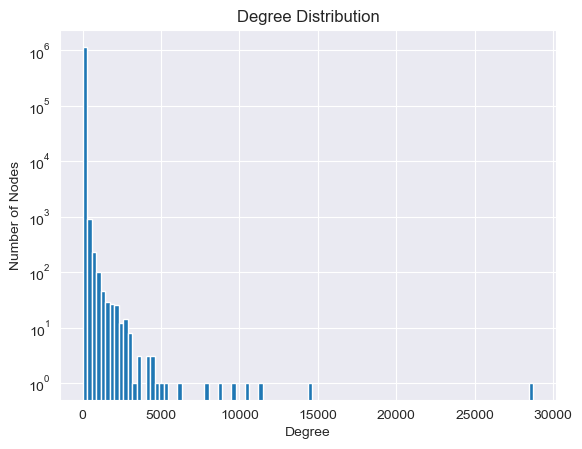

In [5]:
# Draw the log histogram of the degree distribution
plt.hist(g.degree(), bins=100, log=True)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.show()

### b. Identify the most influential nodes in a network and analyze them.

In [6]:
# Calculate degree centrality for all nodes
degrees = g.degree()

In [7]:
# Identify the most influential nodes
# Choose the number of nodes to display
top_n = 50

# Get the indices of the top n nodes
top_nodes = sorted(range(len(degrees)), key=lambda i: degrees[i], reverse=True)[:top_n]
top_centrality_values = [degrees[i] for i in top_nodes]

# Print the results
print("The most influential nodes:", top_nodes)
print("Their degree centrality:", top_centrality_values)

The most influential nodes: [1071, 362, 35660, 105, 482708, 663930, 928, 807, 27836, 108623, 2686, 663605, 2632, 1845, 479, 831, 1244, 1190, 2525, 663559, 802, 3424, 44005, 115673, 383, 21170, 155431, 4718, 115240, 516, 8745, 110104, 105477, 1431, 280435, 664788, 697671, 3, 772, 103, 209, 310, 20363, 2782, 2538, 27801, 340, 1489, 687, 27543]
Their degree centrality: [28754, 14641, 11281, 10461, 9762, 8843, 7917, 6102, 5393, 4899, 4877, 4422, 4364, 4352, 4253, 4217, 4044, 3707, 3621, 3506, 3394, 3160, 3114, 3100, 3035, 3024, 2992, 2956, 2924, 2866, 2866, 2837, 2830, 2818, 2800, 2799, 2763, 2753, 2742, 2720, 2634, 2628, 2591, 2535, 2504, 2488, 2464, 2444, 2400, 2380]


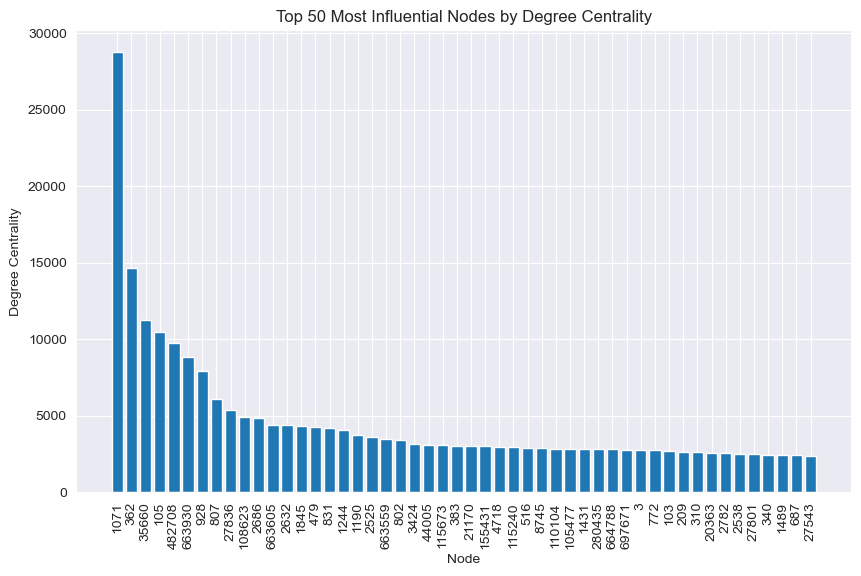

In [8]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.bar(range(top_n), top_centrality_values, tick_label=top_nodes)
plt.title('Top {} Most Influential Nodes by Degree Centrality'.format(top_n))
plt.xlabel('Node')
plt.xticks(rotation=90)
plt.ylabel('Degree Centrality')
plt.show()

Next, we will visualize the most influential nodes in the network.

In [9]:
# Most influential node
most_influential_node = top_nodes[0]

# Calculate the number of neighbors of the most influential node
num_neighbors = len(g.neighbors(most_influential_node))
print("Number of neighbors of the most influential node:", num_neighbors)

# Get the degrees of the neighbors of the most influential node
neighbor_degrees = g.degree(g.neighbors(most_influential_node))

# Calculate the average degree of the neighbors of the most influential node
average_neighbor_degree = sum(neighbor_degrees) / len(neighbor_degrees)
print("Average degree of the neighbors:", average_neighbor_degree)

Number of neighbors of the most influential node: 28754
Average degree of the neighbors: 40.92588857202476


In [10]:
# Draw the subgraph of the most influential node
subgraph = g.subgraph([most_influential_node] + g.neighbors(most_influential_node))
ig.plot(subgraph, vertex_label=range(len(subgraph.vs)), vertex_label_size=5, target="../Q7_Image/most_influential_node_full.png")

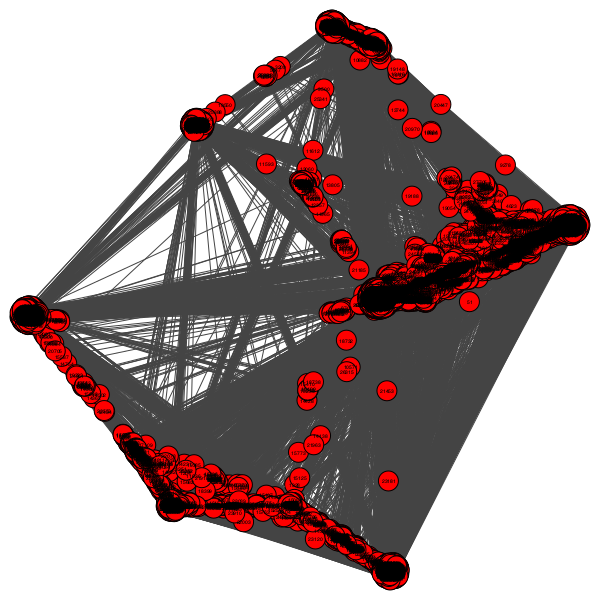

In [10]:
# Show the Image
Image(filename='../Q7_Image/most_influential_node_full.png')

Since the most influential node has a large number of neighbors, it is difficult to visualize the subgraph of the most influential node.
Therefore, we will select a part of the neighbors of the most influential node to visualize.

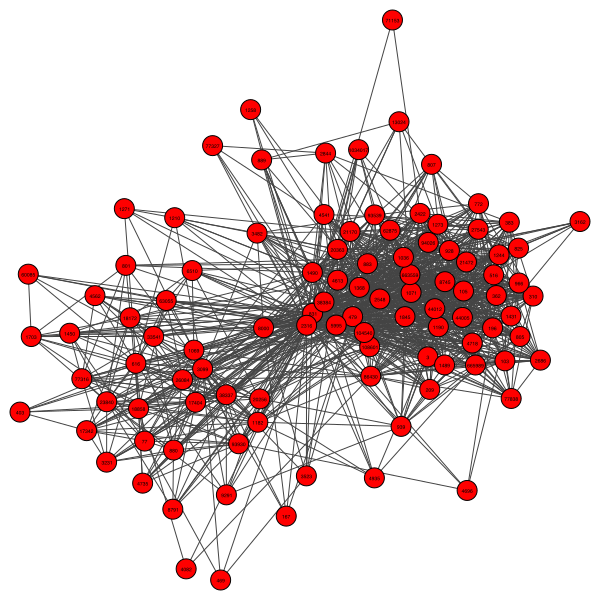

In [11]:
# Select part of the neighbors for visualization
top_k_neighbors = 100
neighbors = g.neighbors(most_influential_node)
neighbors_sorted_by_degree = sorted(neighbors, key=lambda n: g.degree(n), reverse=True)
selected_neighbors = neighbors_sorted_by_degree[:top_k_neighbors]

subgraph = g.subgraph([most_influential_node] + selected_neighbors)

# Map the indices in the original graph to the subgraph
subgraph_vertex_labels = [g.vs[node].index for node in [most_influential_node] + selected_neighbors]

# Visualize the subgraph
ig.plot(subgraph, vertex_label=subgraph_vertex_labels, vertex_label_size=5, target="../Q7_Image/most_influential_node_100.png")

### c. Identify Isolated Nodes in the Network

In [13]:
# Identify the isolated nodes
isolated_nodes = [node for node, degree in enumerate(degrees) if degree == 0]

Number of Isolated Nodes: 22937
50 of them: [635473, 635474, 635475, 635476, 635477, 635478, 635479, 635480, 635481, 635482, 635483, 635484, 635485, 635488, 635489, 635490, 635491, 635493, 635494, 635495, 635496, 635498, 635499, 635501, 635502, 635503, 635505, 635506, 635512, 635513, 635514, 635515, 635517, 635518, 635519, 635520, 635521, 635522, 635523, 635524, 635525, 635527, 635528, 635529, 635531, 635532, 635533, 635534, 635535, 635536]


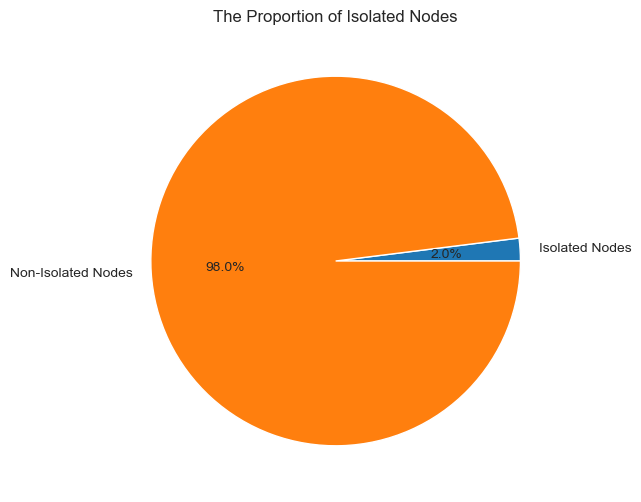

In [14]:
# Print the number of isolated nodes and show 50 of them
num_isolated_nodes = len(isolated_nodes)
print("Number of Isolated Nodes:", num_isolated_nodes)
print("50 of them:", isolated_nodes[:50])

plt.figure(figsize=(6, 6))
plt.pie([num_isolated_nodes, len(degrees) - num_isolated_nodes], labels=['Isolated Nodes', 'Non-Isolated Nodes'], autopct='%1.1f%%')
plt.title('The Proportion of Isolated Nodes')
plt.show()

### d. Recognize Connected Components in the Network

In [15]:
# Get the all connected components
connected_components = g.connected_components()

In [16]:
# Get the sizes of all connected components
num_components = len(connected_components)
print("The number of connected components:", num_components)

# Number of components with size > 1
num_nontrivial_components = sum([1 for component in connected_components if len(component) > 1])
print("The number of nontrivial connected components:", num_nontrivial_components)

# The size of the largest component
component_sizes = connected_components.sizes()
largest_component_size = max(component_sizes)
print("The size of the largest component:", largest_component_size)

The number of connected components: 22938
The number of nontrivial connected components: 1
The size of the largest component: 1134890


### e. Compute Average Shortest Path Length of the Network.
### f. Calculate the Diameter of the Network

In [ ]:
# # Since only one component has size > 1, we can get the largest component by using the giant() method
# largest_component = g.connected_components().giant()
# # Calculate the average shortest path length
# avg_shortest_path_length = largest_component.average_path_length()
# print("The average shortest path length:", avg_shortest_path_length)
# 
# # Calculate the diameter
# diameter = largest_component.diameter()
# print("The diameter:", diameter)

Due to the large size of the original dataset, it takes a long time to calculate the average shortest path length and diameter.
Therefore, we will use a sampled dataset to calculate these metrics.

In [17]:
# set the seed
random.seed(50015940)

# Set the sampling ratio
sampling_ratio = 0.1

# Choose a subset of edges from the original dataset randomly
sampled_edges = random.sample(edges, int(len(edges) * sampling_ratio))

In [18]:
# Create a sampled graph
sampled_graph = Graph(sampled_edges, directed=False)

# Get the connected components from the sampled graph
sample_connected_components = sampled_graph.connected_components()

# Get the largest component from the sampled graph
largest_component_sampled = sample_connected_components.giant()

In [19]:
# Calculate the average shortest path length of the sampled graph
sample_avg_shortest_path_length = largest_component_sampled.average_path_length()
print("The average shortest path length:", sample_avg_shortest_path_length)

The average shortest path length: 6.65350200406293


In [20]:
# Calculate the diameter of the sampled graph
sample_diameter = largest_component_sampled.diameter()
print("The diameter:", sample_diameter)

The diameter: 28


### g. Detect Community Structures in the Network

In [21]:
# community_multilevel
communities = g.community_multilevel()

In [22]:
# Number of communities
num_communities = len(communities)
print("Number of communities detected:", num_communities)

# Size of each community
community_sizes = communities.sizes()

# Average size of communities
avg_community_size = sum(community_sizes) / num_communities
print("Average size of communities:", avg_community_size)

Number of communities detected: 28950
Average size of communities: 39.994024179620034


Due to the large size of the original dataset, it takes a long time to visualize the communities.
Therefore, we choose the communities with size between 20 and 100 to visualize.

In [ ]:
# # Assign a color to each community
# color_map = cm.get_cmap('viridis', num_communities)
# community_colors = [color_map(c) for c in communities.membership]
# 
# # Plot the graph
# ig.plot(g, vertex_color=community_colors)

In [40]:
# Select the communities with size between 20 and 100
selected_community_indices = [i for i, size in enumerate(community_sizes) if 20 <= size <= 100]

In [41]:
# Get the vertices to include in the subgraph
vertices_to_include = []
for community_index in selected_community_indices:
    vertices_to_include.extend(communities[community_index])

subgraph = g.subgraph(vertices_to_include)

# Get the number of communities to visualize
num_sample_communities = len(selected_community_indices)

In [42]:
# Get the color map
sample_color_map = cm.get_cmap('viridis', num_sample_communities)

# Assign a color to each community in the subgraph
sample_community_colors = [sample_color_map(communities.membership[v]) for v in vertices_to_include if v in communities.membership]

/var/folders/n7/7084b4k93jb_r5psql_6_sjh0000gn/T/ipykernel_96937/2757843461.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  sample_color_map = cm.get_cmap('viridis', num_sample_communities)


In [43]:
# Visualize the subgraph
ig.plot(subgraph, vertex_color=sample_community_colors, target="../Q7_Image/community_multilevel_sampled.png")